In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataSet

In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [6]:
#Target Variable is y
y=train['SalePrice']
train.drop('SalePrice',axis=1,inplace=True)

combined=pd.concat([train,test],keys=['train','test'])
#for performing the preprocessing ,will combine the train and test .

# 2. EDA (Exploratory Data Analysis)
### 2.1.Understand the Data

In [9]:
print("Train shape:",train.shape)
print("Test shape:",test.shape)

Train shape: (1460, 80)
Test shape: (1459, 80)


In [11]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [17]:
test.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [19]:
train.info #for seeing thr datatypes and Missing values

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [21]:
train.describe() #for getting the 5 number summary 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


# 2.2 Visualize Target Distribution 
we will be performing this on train

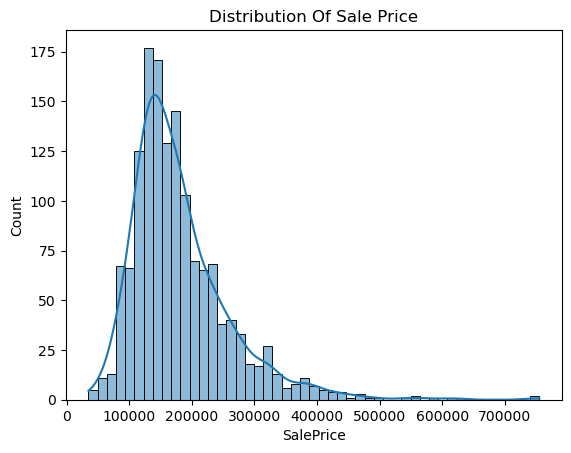

In [24]:
sns.histplot(y,kde=True)
plt.title("Distribution Of Sale Price")
plt.show()

### 2.3.Correlation With SalePrice

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


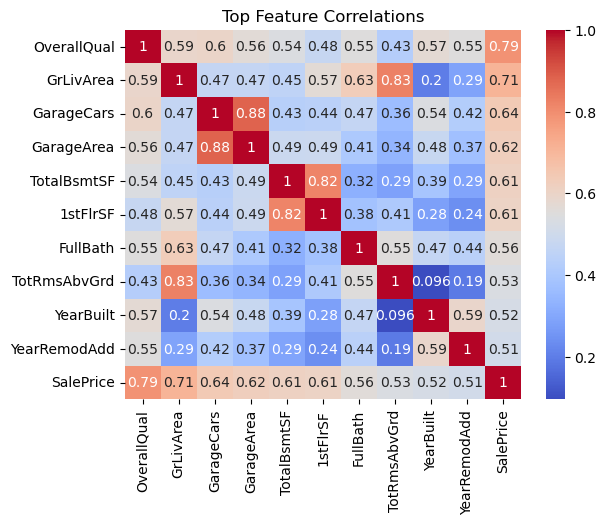

In [27]:
train_with_target=pd.concat([train,y],axis=1)
corr=train_with_target.corr(numeric_only=True)
top_corr=corr['SalePrice'].sort_values(ascending=False)[1:11]
print(top_corr)

#Heatmap of Top correlated
sns.heatmap(train_with_target[top_corr.index.tolist()+['SalePrice']].corr(),annot=True,cmap="coolwarm")
plt.title("Top Feature Correlations")
plt.show()

### 2.4 Missing Value Analysis

In [30]:
missing=combined.isnull().sum()
print(missing)

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [32]:
missing=missing[missing>0].sort_values(ascending=False)
print(missing)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageArea         1
GarageCars         1
Electrical         1
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


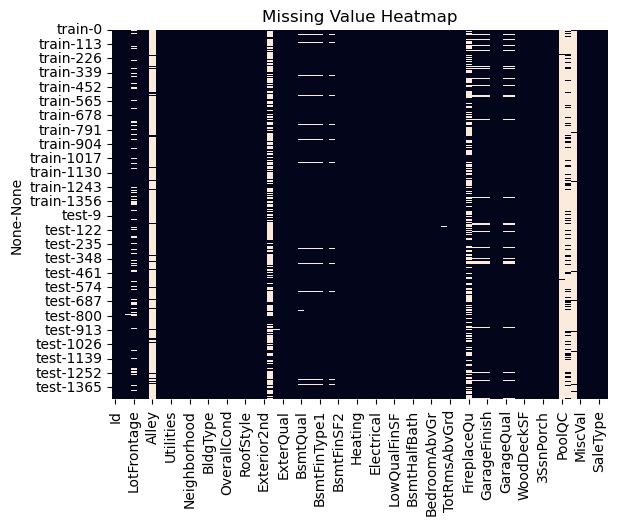

In [34]:
sns.heatmap(combined.isnull(),cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

### 2.5 Boxplots FO Ccategorical Features

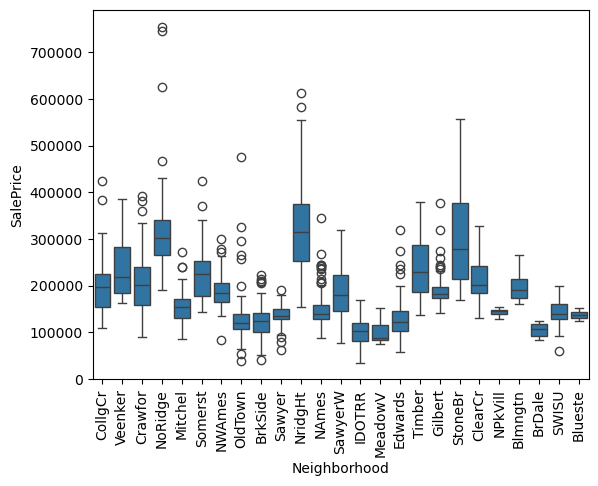

In [37]:
train_with_target['Neighborhood']=combined.loc["train",'Neighborhood']
sns.boxplot(x='Neighborhood',y='SalePrice',data=train_with_target)
plt.xticks(rotation=90)
plt.show()

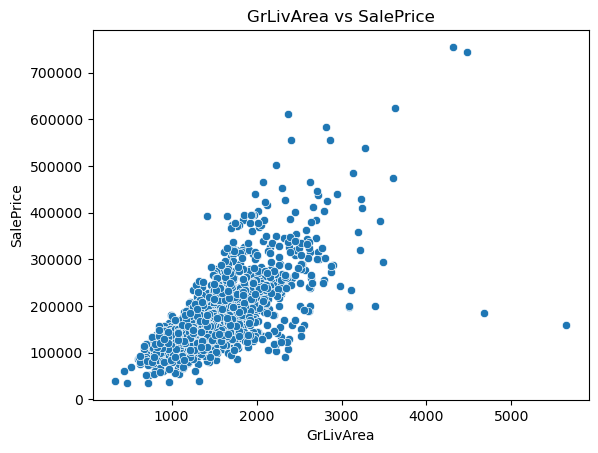

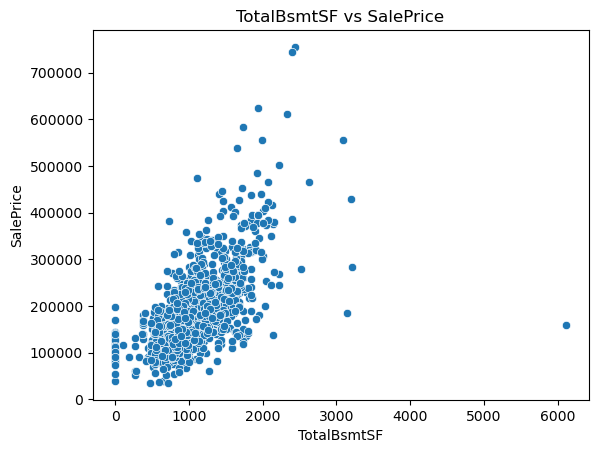

In [39]:
for col in ['GrLivArea', 'TotalBsmtSF']:
    sns.scatterplot(x=train_with_target[col],y=y)
    plt.title(f"{col} vs SalePrice")
    plt.show()

# 3.Data Preprocessing
### 3.1.Handle Missing Values 

#To handle the numeric columns we will fill the values with mean or median ased on the outliers

#To handle the categorical Columns we will fill the null values with Mode or "None" if missing means absense

In [43]:
na_as_none=['Alley','PoolQC','Fence','FireplaceQu','MiscFeature','GarageType']
for col in na_as_none:
    combined[col]=combined[col].fillna("None")

num_cols=combined.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    combined[col]=combined[col].fillna(combined[col].median())

# 4: Feature Engineering

In [46]:
combined['TotalSF']=combined['TotalBsmtSF']+combined['1stFlrSF']+combined['2ndFlrSF']
combined['TotalBathrooms']=(
    combined['FullBath']+0.5*combined['HalfBath']+
    combined['BsmtFullBath']+0.5*combined['BsmtHalfBath']
)
combined['HasPool']=combined['PoolArea'].apply(lambda x:1 if x>0 else 0)

# 5: Encoding Categorical Features

In [49]:
from sklearn.preprocessing import LabelEncoder

ordinals = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual']
for col in ordinals:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col].astype(str))
combined=pd.get_dummies(combined)

# 6: Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = combined.select_dtypes(include=['float64', 'int64']).columns
combined[num_cols] = scaler.fit_transform(combined[num_cols])


# 7:Split Back Train/Test

In [55]:
X_train=combined.loc['train']
X_test=combined.loc['test']

# 8: Train Machine Learning Models

In [79]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 6.3 MB/s eta 0:00:24
    --------------------------------------- 2.4/150.0 MB 5.8 MB/s eta 0:00:26
    --------------------------------------- 3.7/150.0 MB 6.1 MB/s eta 0:00:25
   - -------------------------------------- 4.7/150.0 MB 5.7 MB/s eta 0:00:26
   - -------------------------------------- 6.0/150.0 MB 5.8 MB/s eta 0:00:25
   - -------------------------------------- 7.3/150.0 MB 5.8 MB/s eta 0:00:25
   -- ------------------------------------- 8.7/150.0 MB 5.8 MB/s eta 0:00:25
   -- ------------------------------------- 9.7/150.0 MB 5.8 MB/s eta 0:00:25
   -- ------------------------------------- 11.0/150.0 MB 5.8 MB/s eta 0:00:25
   --- ------------------------------------ 12.3/150.0 MB 5.8 MB/s eta 0:00:24
   --- ------------------------------------ 13.1/150.0 MB 5.7 MB/s et

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [60]:
lr=LinearRegression()
rf=RandomForestRegressor(random_state=42)
xgb=XGBRegressor(random_state=42)

In [64]:
#EVALUATION
for model in [lr,rf,xgb]:
    scores=cross_val_score(model,X_train,y,scoring='neg_root_mean_squared_error',cv=5)
    print(model.__class__.__name__,"CV RMSE:",-scores.mean())

LinearRegression CV RMSE: 611208278810725.6
RandomForestRegressor CV RMSE: 29017.134689672228
XGBRegressor CV RMSE: 29042.882466186933


# 9: Predict on Test Data

In [66]:
# Fit best model
xgb.fit(X_train, y)
predictions = xgb.predict(X_test)

# 10: Create Submission File

In [68]:
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": predictions
})
submission.to_csv("submission.csv", index=False)
